In [11]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from PIL import Image
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [4]:
dataset =  "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file("flower_photos",origin=dataset,cache_dir=".",untar=True)

In [6]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [7]:
img_count = len(list(data_dir.glob("*/*.jpg")))
img_count

3670

In [9]:
roses =  list(data_dir.glob(("roses/*")))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

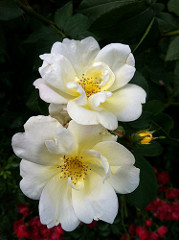

In [16]:
Image.open(str(roses[0]))

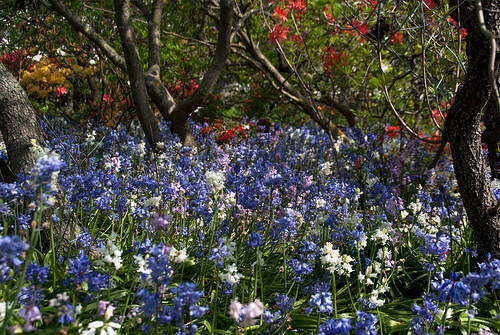

In [17]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[1]))

In [18]:
flower_images_dic ={"roses" : list(data_dir.glob('roses/*')),
                    "tulips" : list(data_dir.glob('tulips/*')),
                    "daisy" : list(data_dir.glob('daisy/*')),
                    "dandelion" : list(data_dir.glob('dandelion/*')),
                    "sunflowers" : list(data_dir.glob('sunflowers/*'))}


In [21]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [24]:
str(flower_images_dic['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [28]:
img = cv2.imread(str(flower_images_dic['roses'][0]))

In [29]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [35]:
# now we will resize every image in data set using for loop
X,Y = [],[]
for flower_name,images in flower_images_dic.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img =  (cv2.resize(img,(180,180)))
        X.append(resized_img)
        Y.append(flowers_labels_dict[flower_name])

X = np.array(X)
Y = np.array(Y)
        

In [36]:
'''Train Test Split '''
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)

In [37]:
'''Scaling'''
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [38]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
86/86 [==============================] - 26s 272ms/step - loss: 1.3247 - accuracy: 0.4106
Epoch 2/10
86/86 [==============================] - 23s 267ms/step - loss: 0.9901 - accuracy: 0.6181
Epoch 3/10
86/86 [==============================] - 23s 264ms/step - loss: 0.8214 - accuracy: 0.6817
Epoch 4/10
86/86 [==============================] - 24s 282ms/step - loss: 0.6494 - accuracy: 0.7515
Epoch 5/10
86/86 [==============================] - 34s 391ms/step - loss: 0.4590 - accuracy: 0.8376
Epoch 6/10
86/86 [==============================] - 41s 478ms/step - loss: 0.2766 - accuracy: 0.9059
Epoch 7/10
86/86 [==============================] - 39s 457ms/step - loss: 0.1552 - accuracy: 0.9553
Epoch 8/10
86/86 [==============================] - 39s 451ms/step - loss: 0.1229 - accuracy: 0.9662
Epoch 9/10
86/86 [==============================] - 38s 444ms/step - loss: 0.0561 - accuracy: 0.9855
Epoch 10/10
86/86 [==============================] - 35s 403ms/step - loss: 0.0358 - accura

In [39]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 3s 73ms/step - loss: 2.0303 - accuracy: 0.6460


[2.0303077697753906, 0.6459695100784302]

In [40]:
''' This shows overfitting of the model'''
'''We will use Augmentation to solve it and make the evaluation of the model better and general'''

'We will use Augmentation to solve it and make the evaluation of the model better and general'

In [48]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(180, 180,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

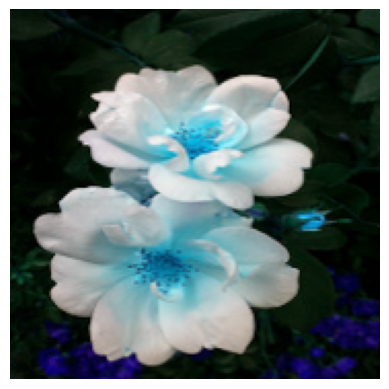

In [42]:
plt.axis('off')
plt.imshow(X[0])

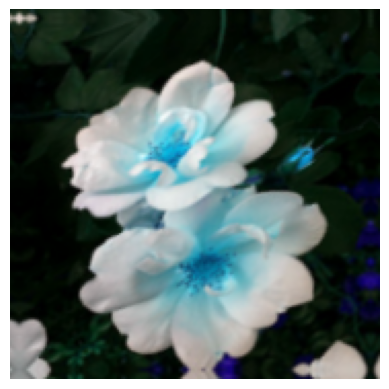

In [49]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

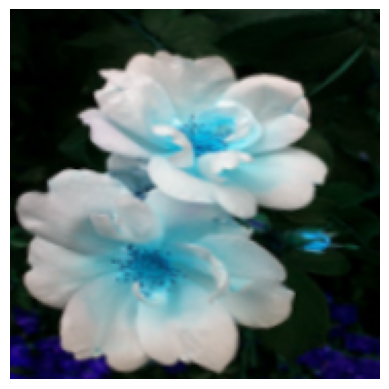

In [52]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  #layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
86/86 [==============================] - 32s 340ms/step - loss: 1.4084 - accuracy: 0.3852
Epoch 2/10
86/86 [==============================] - 30s 345ms/step - loss: 1.0943 - accuracy: 0.5545
Epoch 3/10
86/86 [==============================] - 36s 423ms/step - loss: 0.9720 - accuracy: 0.6243
Epoch 4/10
86/86 [==============================] - 36s 416ms/step - loss: 0.8999 - accuracy: 0.6530
Epoch 5/10
86/86 [==============================] - 35s 411ms/step - loss: 0.8552 - accuracy: 0.6759
Epoch 6/10
86/86 [==============================] - 40s 470ms/step - loss: 0.8039 - accuracy: 0.6879
Epoch 7/10
86/86 [==============================] - 38s 444ms/step - loss: 0.7599 - accuracy: 0.7075
Epoch 8/10
86/86 [==============================] - 38s 438ms/step - loss: 0.7256 - accuracy: 0.7282
Epoch 9/10
86/86 [==============================] - 46s 532ms/step - loss: 0.6928 - accuracy: 0.7355
Epoch 10/10
86/86 [==============================] - 39s 458ms/step - loss: 0.6642 - accura

In [53]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 3s 80ms/step - loss: 0.8122 - accuracy: 0.7168


[0.8121733069419861, 0.7167755961418152]

In [ ]:
 ''''when we use drop out 
    29/29 [==============================] - 3s 84ms/step - loss: 0.8020 - accuracy: 0.7124
'''